In [1]:
import jax.numpy as jnp
import numpy as onp
from jax.config import config
config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

from lbg_forecast.modified_redshift import nz_hat
from lbg_forecast.angular_power import cl_hat
from lbg_forecast.angular_power import define_cosmo

In [24]:
def plot_jax_nz(nz, z_space):
    """
    Utility function for plotting jax redshift distributions

    """
    func = []
    for z in z_space:
        func.append(nz.pz_fn(z))
        
    plt.plot(z_space, func, color="r", lw=5)
    
    return func

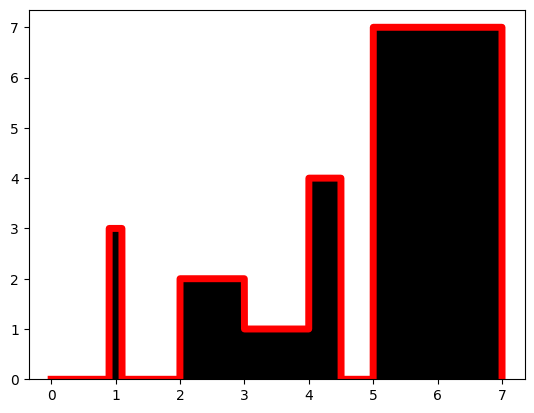

In [34]:
data = onp.array([1, 1, 1, 2, 2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7])
bin_edges = onp.array([0, 0.5, 0.9, 1.1, 2.0, 3, 4, 4.5, 4.9, 5.0, 7.0])
hist, bins = onp.histogram(data, bin_edges)

#plot numpy histogram (black shaded area)
plt.hist(data, bin_edges, color="k")
area_under_curve_numpy = onp.sum(hist*onp.diff(bin_edges))

#plot jax redshift histogram (red solid line)
nzhat = nz_hat(hist, bin_edges)
dz = 1e-3
z_space = jnp.arange(0.0, 7.0+dz, dz)
func = plot_jax_nz(nzhat, z_space)
area_under_curve_jax_redshift = onp.trapz(func, z_space)

onp.testing.assert_allclose(area_under_curve_numpy, 
                            area_under_curve_jax_redshift,
                              rtol=1e-10)

In [35]:
ell = jnp.arange(200, 1000, 1)

In [7]:
cl = cl_hat(define_cosmo(), hist, bin_edges, ell)

TypeError: le got incompatible shapes for broadcasting: (9,), (257,).

In [ ]:
plt.plot(ell, cl)
plt.yscale("log")